# Job Rejection Letters Analysis ![title](images/AppRejected.JPG)

In [1]:
import sys
import os
import time
import re
import csv
import pandas as pd
import numpy as np


import nltk
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import stopwords
from collections import Counter
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble  import AdaBoostRegressor

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.3)

[nltk_data] Downloading package punkt to /home/hvyd/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/hvyd/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Import and Process Data 

In [2]:
df = pd.read_csv('data/rejections.csv')
df = df.dropna()
df.head()

,Date,Time,Day,Hour,Subject,Text
0,7/12/2018 12:31,12:31:08,Thurs,12.0,Your IBM Application,Ref: 110127BR - 2018 Data Scientist \n\nDear S...
1,6/12/2018 16:30,16:30:28,Tues,16.0,Thank you from Workday!,"<!doctype html><html xmlns:o=3D""urn:schemas-mi..."
2,5/17/2018 8:43,8:43:38,Thurs,8.0,An Update Regarding Your Visa Job Application,"\nDear Scott,\nThank you for giving us the opp..."
3,5/1/2018 15:21,15:21:05,Tues,15.0,Thank you for your interest in Zynga for Inter...,<html><head>\n<meta http-equiv=3DContent-Type ...
4,4/26/2018 14:49,14:49:02,Thurs,14.0,Your Application with Cambia Health Solutions,"Dear Scott,\n=C2=A0\nThank you for the interes..."


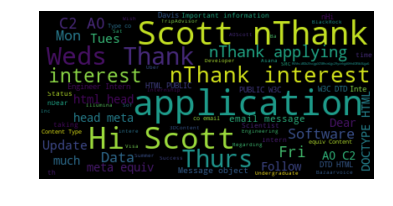

In [3]:
wordcloud = WordCloud(max_font_size=42).generate(str(df))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 85
Data columns (total 6 columns):
Date       61 non-null object
Time       61 non-null object
Day        61 non-null object
Hour       61 non-null float64
Subject    61 non-null object
Text       61 non-null object
dtypes: float64(1), object(5)
memory usage: 3.3+ KB


In [5]:
df.shape

(61, 6)

In [6]:
df.describe()

,Hour
count,61.000000
mean,11.836066
std,3.236152
min,5.000000
25%,9.000000
50%,12.000000
75%,14.000000
max,22.000000


## Visualize Days of rejection

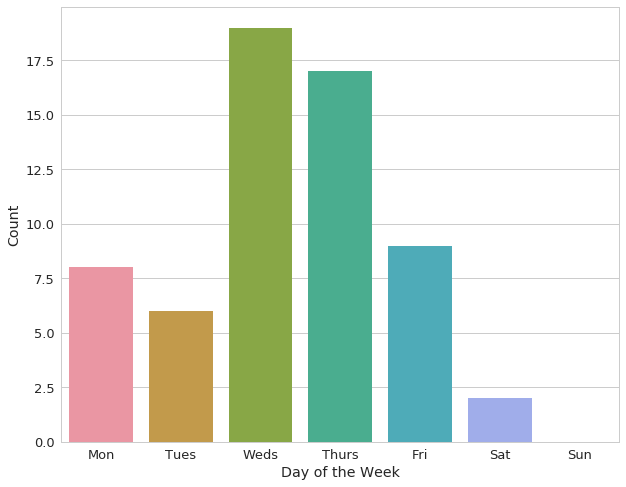

In [7]:
plt.figure(figsize=(10,8))
sns.countplot(df['Day'], order=['Mon', 'Tues', 'Weds', 'Thurs', 'Fri', 'Sat', 'Sun']);
plt.xlabel('Day of the Week')
plt.ylabel('Count');

### Lets see which company likes to send weekend and late night rejections

In [8]:
sat = df.loc[df['Day'] == 'Sat']
sat

,Date,Time,Day,Hour,Subject,Text
46,12/16/2017 15:04,15:04:42,Sat,15.0,Important information about your application t...,"Hi Scott,\nThank you for applying to Software ..."
63,11/4/2017 7:27,7:27:04,Sat,7.0,Thank you for your interest in TripAdvisor,"Hi Scott,\n\nThank you for your interest in th..."


In [9]:
print(sat.iloc[0]['Subject'])
print(sat.iloc[0]['Text'])

Important information about your application to LendUp
Hi Scott,
Thank you for applying to Software Engineering Intern. After reviewing with the team, we have decided not to move forward with your candidacy. Due to the number of applications we receive we are not able to provide specific feedback.

We will keep your details on file and let you know if any suitable openings arise.

Thanks again for your interest in LendUp and we wish you the best of luck in your search!

Regards,
LendUp Recruiting Team


In [10]:
print(sat.iloc[1]['Subject'])
print(sat.iloc[1]['Text'])

Thank you for your interest in TripAdvisor
Hi Scott,

Thank you for your interest in the Machine Learning Engineer position at TripAdvisor. We have received your application and it is currently being reviewed by the hiring team. We will be in touch if there is interest in moving forward.

In the meantime please be sure to visit our careers page ( http://www.tripa=
dvisor.com/careers ) for more information about:

- our benefits and unique perks ( http://www.tripadvisor.com/careers/benefi=
ts )

- who we are and what we value ( http://www.tripadvisor.com/careers/culture=
 )

We encourage you to learn more about our people, our offices, our =E2=80=9C=
speed wins=E2=80=9D culture and the work we do by visiting our Twitter ( ht=
tps://twitter.com/gotripadvisor ),Instagram ( https://www.instagram.com/got=
ripadvisor/ ) and LinkedIn ( https://www.linkedin.com/company/tripadvisor/c=
areers ) pages. These pages provide an inside glimpse of life at TripAdviso=
r offices around the world.

Thank

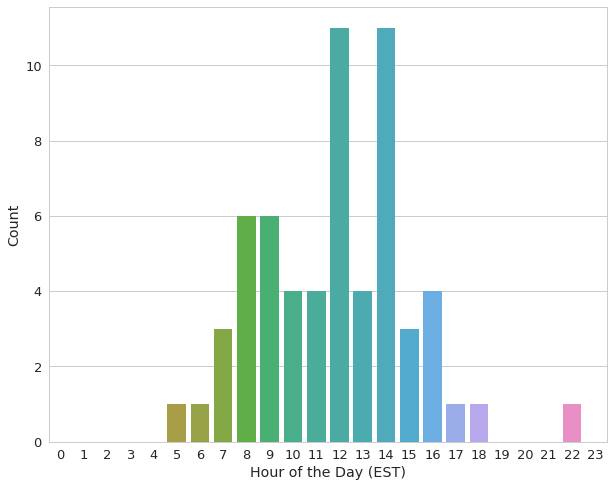

In [11]:
#Visualization
plt.figure(figsize=(10,8))
sns.countplot(df['Hour'], order=np.arange(0,24));
plt.xlabel('Hour of the Day (EST)')
plt.ylabel('Count');

In [12]:
late = df.loc[df['Hour'] == 22]
late

,Date,Time,Day,Hour,Subject,Text
79,9/21/2017 22:08,22:08:37,Thurs,22.0,P&G,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.01//..."


In [13]:
print(late.iloc[0]['Subject'])
print(late.iloc[0]['Text'])

P&G
<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01//EN" "http://www.w3.org/TR/htm=
l4/strict.dtd">
<html>
<head>
<meta http-equiv=3D"Content-Type" content=3D"text/html; charset=3Dutf-8"/><=
title></title>
</head>
<body style=3D'font-family: Arial, Times New Roman, Verdana, Sans-Serif; pa=
dding: 5px 5px 5px 5px; margin: 0px; border-style: none; background-color: =
#ffffff'>
<div><p style=3D"margin-top:0px;margin-bottom:0px;text-align:center"><img s=
rc=3D "http://pg.taleo.net/custom/images/company_logo_01.gif"> </img></p>
<p style=3D"margin-top:0px;margin-bottom:0px">&nbsp;</p></div><div><p style=
=3D"margin-top: 0px; margin-bottom: 0px;">Dear&nbsp; Scott,</p>
<p style=3D"margin-top: 0px; margin-bottom: 0px;">&nbsp;</p>
<p style=3D"margin-top: 0px; margin-bottom: 0px;">Thank you for applying to=
 Information Technology -  Data Scientist =E2=80=93 Internship =E2=80=93 Sw=
itzerland - IT 00001031.&nbsp; We appreciate your interest in Procter &amp;=
 Gamble.</p>
<p style=3D"margin-top: 0px;

In [14]:
subject_str = df['Subject'].to_string()
words = nltk.word_tokenize(subject_str)
clean = [word for word in words if word not in stopwords.words('english')]

punctuation = re.compile(r'[-.?!,":;()|0-9]')
clean = [punctuation.sub("", word) for word in clean]
clean = [word.lower() for word in clean if len(word) > 0]

words = [item[0] for item in Counter(clean).most_common(10)]
counts = [item[1] for item in Counter(clean).most_common(10)]

In [15]:
# List of common words and counts
your_list = str(words)
your_list, counts

("['application', 'your', 'thank', 'interest', 'data', 'intern', 'software', 'update', 'thanks', 'scott']",
 [34, 16, 10, 8, 7, 7, 7, 6, 5, 5])

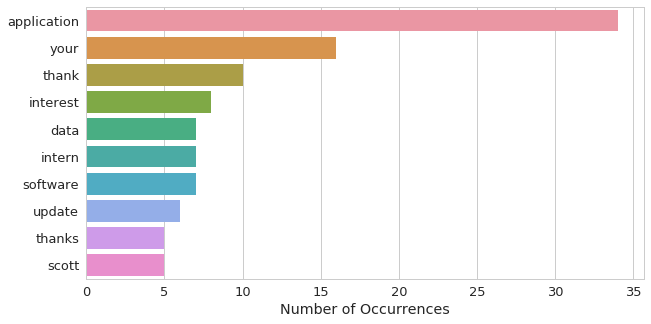

In [16]:
# Visualization
plt.figure(figsize=(10,5))
sns.barplot(counts, words);
plt.ylabel('');
plt.xlabel('Number of Occurrences');

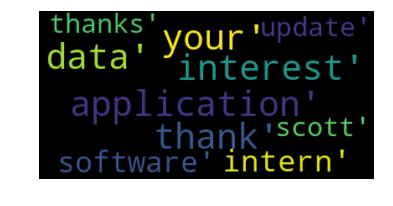

In [17]:
#WordCloud of common words for fun
wordcloud = WordCloud(max_font_size=42).generate(your_list)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [18]:
y_counts = [item[1] for item in Counter(clean).most_common(61)]

# Random Forest

In [19]:
X = df[['Hour']].values
y = y_counts


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [21]:
forest = RandomForestRegressor(n_estimators=500, criterion='mse', random_state=42, n_jobs=-1)

In [22]:
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [23]:
y_train_pred = forest.predict(X_train)

In [24]:
y_test_pred = forest.predict(X_test)

In [25]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))

MSE train: 5.5334, test: 61.6290


In [26]:
print("R2 train: {0:.4f}, test: {1:.4f}".\
     format(r2_score(y_train, y_train_pred),
           r2_score(y_test, y_test_pred)))

R2 train: 0.2836, test: -0.1608


# AdaBoost

In [27]:
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                        n_estimators=500, random_state=42)

In [28]:
ada.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=500,
         random_state=42)

In [29]:
y_train_pred = ada.predict(X_train)

In [30]:
y_test_pred = ada.predict(X_test)

In [31]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))

MSE train: 5.9849, test: 61.3068


In [32]:
print("R2 train: {0:.4f}, test: {1:.4f}".\
     format(r2_score(y_train, y_train_pred),
           r2_score(y_test, y_test_pred)))

R2 train: 0.2251, test: -0.1547
